In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [14]:
# Python SQL toolkit and Object Relational Mapper #and added inspect
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [15]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [16]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [17]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [18]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [19]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [22]:
#Inspect the data
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [24]:
# Get the column names and types
columns = inspector.get_columns('measurement')
for x in columns:
    print(x['name'],x['type'])
    

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Precipitation Analysis

In [29]:
arr = [1,2,3,4,5]

In [30]:
arr[4]

5

In [41]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).all()[0][0]
most_recent_date = dt.datetime.strptime(most_recent_date, '%Y-%m-%d')
most_recent_date

datetime.datetime(2017, 8, 23, 0, 0)

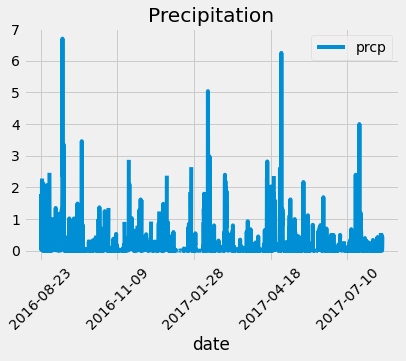

<Figure size 1440x720 with 0 Axes>

In [65]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year = most_recent_date - dt.timedelta(366)

# Perform a query to retrieve the data and precipitation scores
result = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>=prev_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(result).set_index('date')

# Sort the dataframe by date
df.sort_index(inplace = True)

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot=45,title='Precipitation')
plt.figure(figsize=(20,10))
plt.show()

In [66]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [74]:
# Design a query to calculate the total number stations in the dataset
session.query(Station).count()

9

In [90]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
mas = session.query(Measurement.station, func.count()).group_by(Measurement.station).order_by(func.count().desc()).all()
mas

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [95]:
mas[0][0]

'USC00519281'

In [105]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temps = session.query(func.Max(Measurement.prcp), func.AVG(Measurement.prcp), func.Min(Measurement.prcp))\
                .filter(Measurement.station==mas[0][0]).all()[0]

{'Highest':temps[0],'AVG':temps[1],'Lowest': temps[2]}

{'Highest': 9.64, 'AVG': 0.2123520923520915, 'Lowest': 0.0}

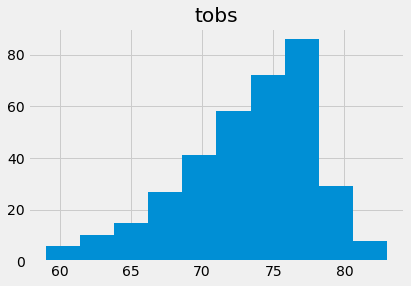

In [110]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
result = session.query(Measurement.tobs).filter((Measurement.station==mas[0][0])&(Measurement.date>prev_year)).all()
pd.DataFrame(result).hist()
plt.show()

# Close session

In [111]:
# Close Session
session.close()